## Matrix used for this file is arrest rate.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
# read the downloaded csv file
arrest_df = pd.read_csv("Pittsburgh_Police_Arrest_Data.csv",
                       sep=',', engine='python')

arrest_df

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54665,2046676,22011416,90.0,M,B,2022-04-02T06:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault. / 2709(a)(1) Harassment b...,"3400 Block Forbes AV Pittsburgh, PA 15213",Central Oakland,4,405.0,3.0,3.0,-79.960901,40.438419
54666,2046677,22017275,28.0,M,B,2022-04-01T07:20:00,"900 Block 2nd AV Pittsburgh, PA 15219",2702 Aggravated Assault.,"300 Block Blvd Of The Allies Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.001857,40.438099
54667,2046678,22040766,34.0,F,B,2022-03-19T14:16:00,"2100 Block Bedford AV Pittsburgh, PA 15219",2706 Terroristic Threats. / 5503 Disorderly Co...,"2100 Block Bedford AV Pittsburgh, PA 15219",Bedford Dwellings,2,509.0,6.0,3.0,-79.980686,40.447058
54668,2046679,22027732,18.0,M,B,2022-03-29T08:06:00,"1900 Block Capital AV Pittsburgh, PA 15226",903 Criminal Conspiracy. / 2501 Criminal Homic...,"Roll WY & Reifert ST Pittsburgh, PA 15210",Knoxville,3,3001.0,3.0,5.0,-79.992077,40.408141


In [3]:
# attract the INCIDENTNEIGHBORHOOD column only and count arrests counts for each neighborhood, sort them from large to small
value_counts = arrest_df['INCIDENTNEIGHBORHOOD'].value_counts(dropna=True, sort=True)
value_counts

Central Business District    3324
South Side Flats             2856
Carrick                      1963
East Allegheny               1777
Homewood South               1747
                             ... 
Regent Square                  28
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [4]:
# make a dataframe for value counts and name the index 'neighborhood_name' and 'incidents_counts'
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['neighborhood_name', 'incidents_counts']
df

,neighborhood_name,incidents_counts
0,Central Business District,3324
1,South Side Flats,2856
2,Carrick,1963
3,East Allegheny,1777
4,Homewood South,1747
...,...,...
93,Regent Square,28
94,Central Northside,23
95,Mt. Oliver Boro,18
96,Troy Hill-Herrs Island,6


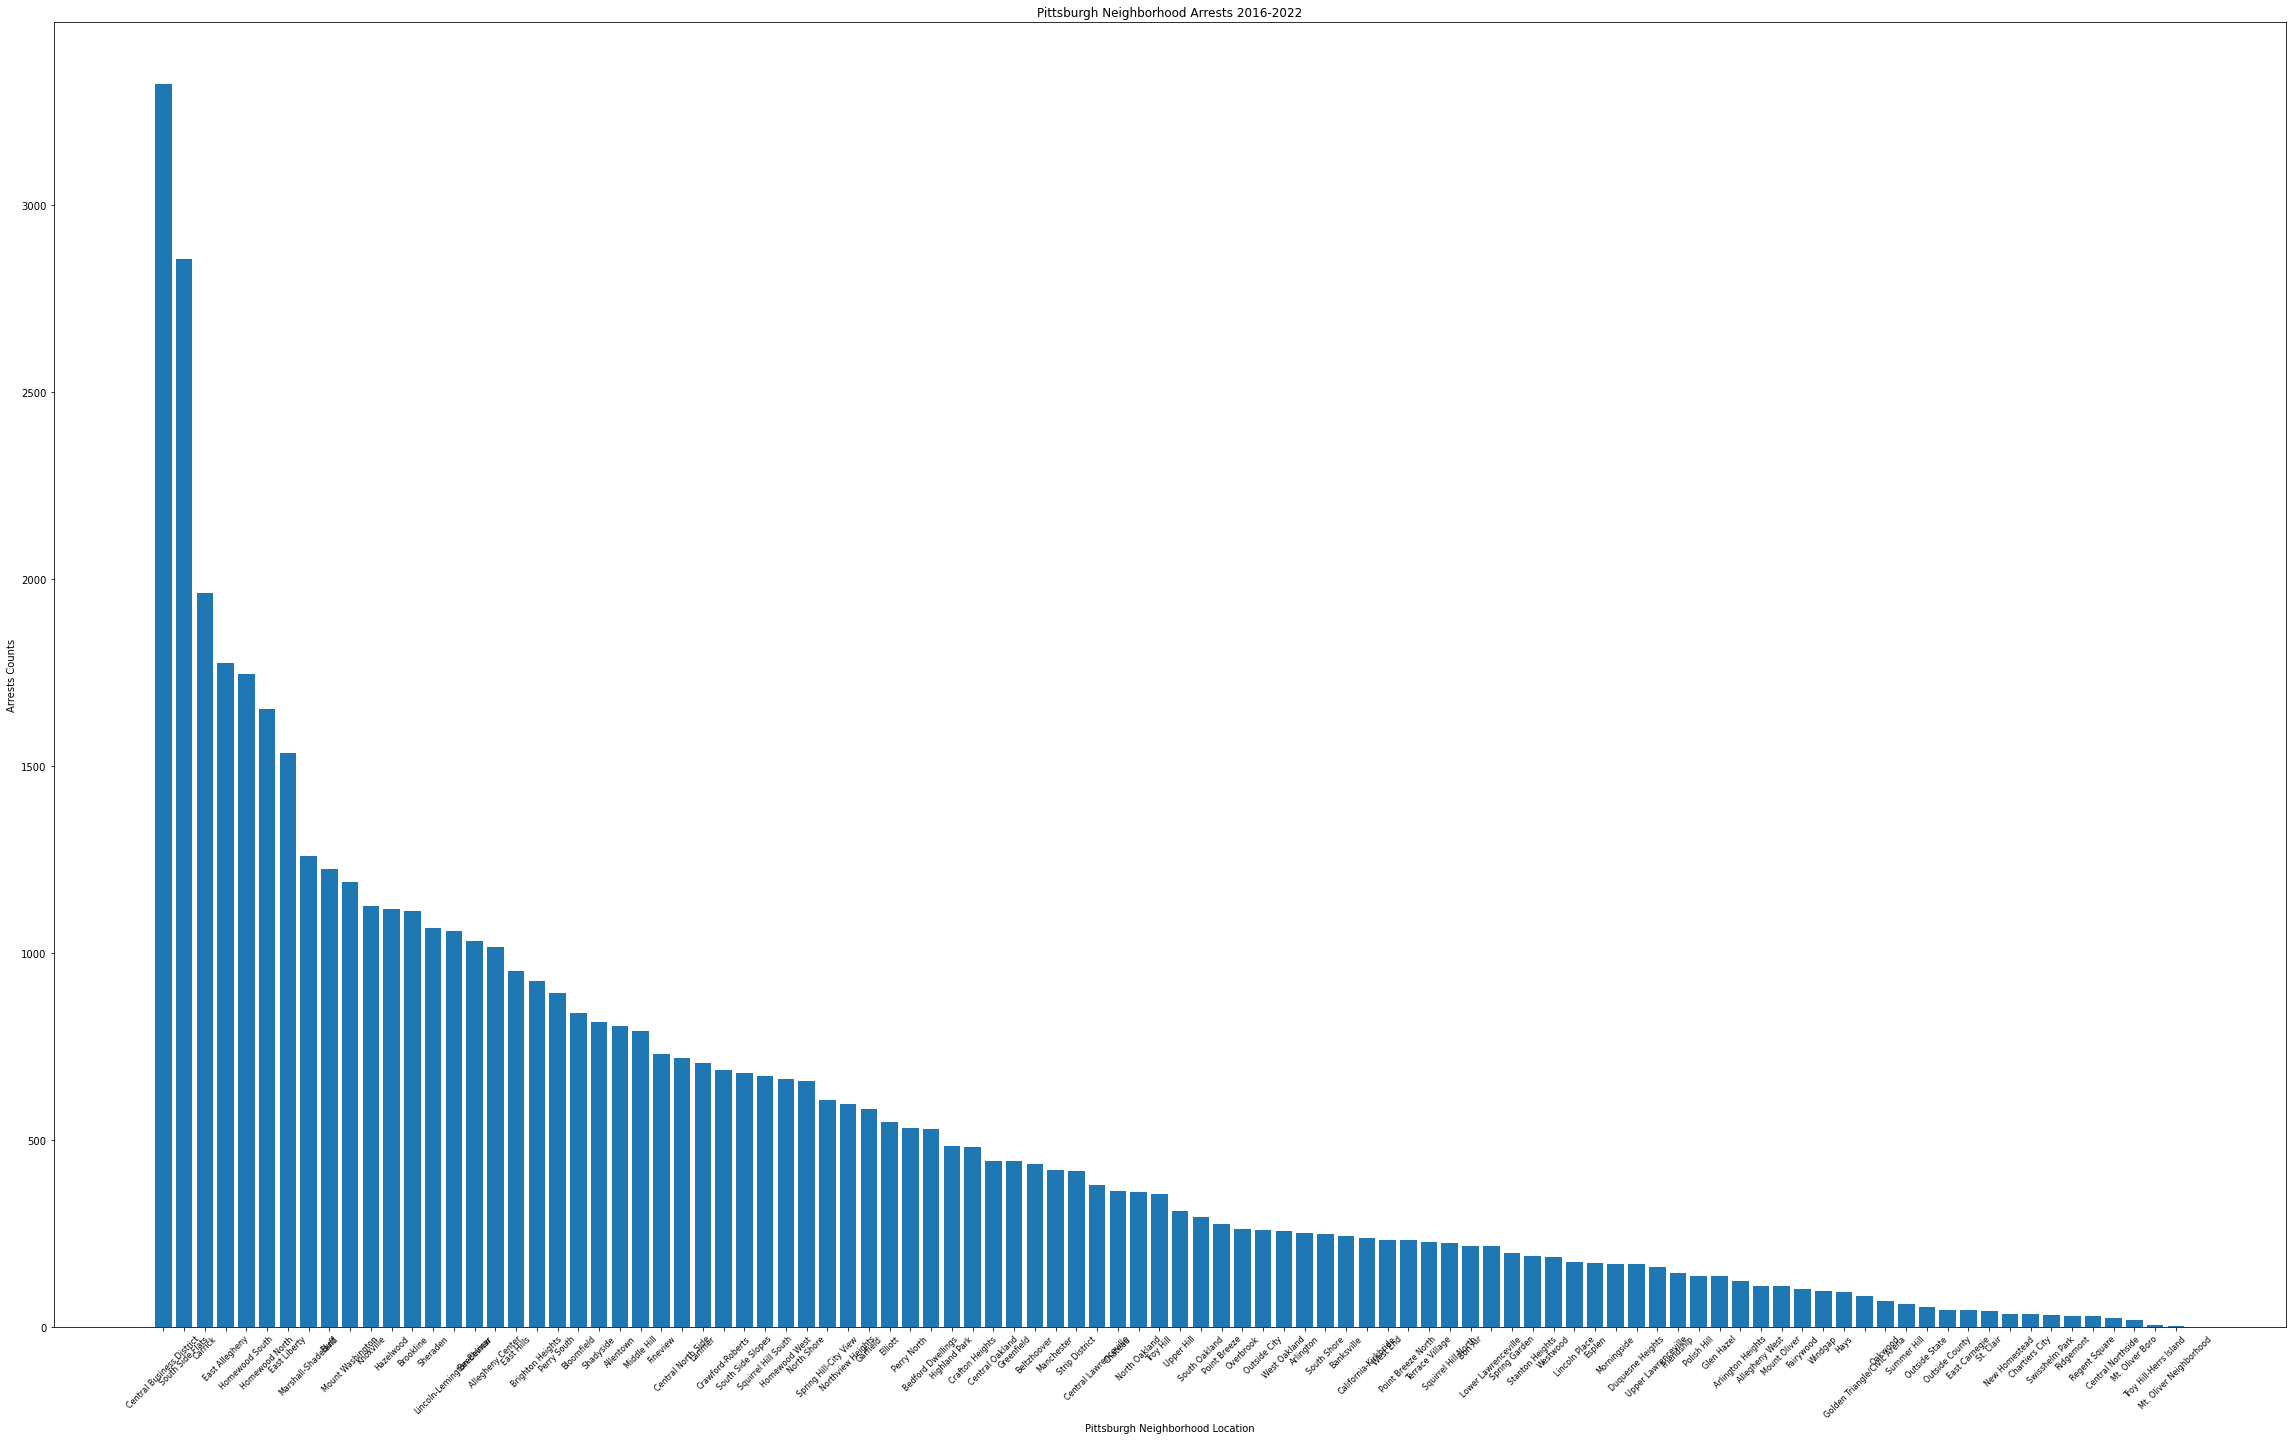

In [5]:
# Initializing a large figure
arrest_plt = plt.figure(figsize=(40, 24))
plt.ticklabel_format(style='plain')
plt.bar(range(len(df['neighborhood_name'])),df['incidents_counts'], align = 'center')

# Formatting graph
plt.xticks(range(len(df['neighborhood_name'])),df['neighborhood_name'], 
           rotation = 45, fontsize = 8)
plt.xlabel('Pittsburgh Neighborhood Location')
plt.ylabel('Arrests Counts')
plt.title('Pittsburgh Neighborhood Arrests 2016-2022')

# save graph
plt.savefig("bar_plot.png")
plt.show()